# Titanic Competition
You should build an end-to-end machine learning pipeline to predict survivors of the Titanic disaster and participate in the corresponding Kaggle competition. In particular, you should do the following:
- Read the Titanic competition page on [Kaggle](https://www.kaggle.com/competitions/titanic/overview).
- Load the `titanic` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including all necessary steps, to have a running solution with some performance.
- Collaborate with your groupmates to finalize your pipeline by
    - reading the discussion forum to learn from other community members;
    - discussing the bottlenecks of your current solution;
    - running experiments on your pipeline;
    - improving the performance of your pipeline.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Present your pipeline.
- Submit your predictions to Kaggle.

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

#Data

##Data Collection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df, random_state =42)

##Data Exploration

In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df_train['Fare'].unique()

array([ 30.5   ,   7.05  ,  14.5   ,   7.5208, 151.55  ,  26.    ,
         7.925 ,  21.    , 262.375 ,   7.75  ,   7.2292,   8.6625,
         7.775 ,  80.    ,   9.8417, 227.525 ,  12.35  ,   0.    ,
         7.225 ,   6.4375,   9.5   ,   8.05  ,   7.8958,   7.25  ,
        12.475 , 133.65  ,   6.975 ,  77.9583,  10.5   , 106.425 ,
        13.    ,  26.55  ,  81.8583,  11.1333,  27.75  ,  26.25  ,
       153.4625,   8.3   ,  15.05  , 110.8833,  15.0458,  39.6875,
         7.8792,  23.45  ,   7.65  ,  15.7417,  15.2458,  51.8625,
        15.5   ,  41.5792,  14.4542,  10.5167,  20.525 ,  89.1042,
        36.75  ,  55.4417,  24.15  ,  50.    ,  13.8625,  16.7   ,
        13.5   ,  21.075 ,  35.    ,  55.9   ,   7.8   ,   7.8542,
        34.375 ,  18.    ,  47.1   ,  19.5   ,  20.25  ,  31.3875,
         8.1125,   7.8292,  59.4   ,  79.2   ,  56.4958,  57.9792,
        25.4667,  46.9   ,  52.5542,  29.125 ,   9.825 ,  14.4583,
        61.175 ,  15.1   ,  66.6   ,  83.1583,  37.0042,  16.1

In [7]:
df_train["Age"].unique()

array([  nan, 25.  , 24.  , 22.  ,  0.92, 26.  , 34.  , 21.  , 62.  ,
       18.  , 42.  , 57.  , 19.  , 20.  , 34.5 , 28.  , 23.  , 52.  ,
       30.  , 36.5 , 50.  , 27.  , 51.  , 36.  , 29.  , 40.  , 65.  ,
       17.  ,  4.  ,  1.  , 43.  , 38.  , 31.  , 39.  , 49.  ,  3.  ,
       40.5 , 54.  , 16.  , 47.  , 60.  , 44.  , 45.  ,  8.  , 32.  ,
       15.  , 41.  , 33.  ,  9.  , 37.  , 46.  , 56.  , 59.  , 58.  ,
       28.5 ,  0.75, 35.  , 55.  ,  2.  , 14.  , 45.5 , 12.  , 11.  ,
        7.  , 70.5 , 70.  , 48.  , 80.  , 55.5 , 14.5 , 10.  , 53.  ,
       32.5 , 74.  , 64.  ,  6.  ,  5.  , 24.5 ,  0.42, 61.  ,  0.67,
       13.  ,  0.83])

<Axes: >

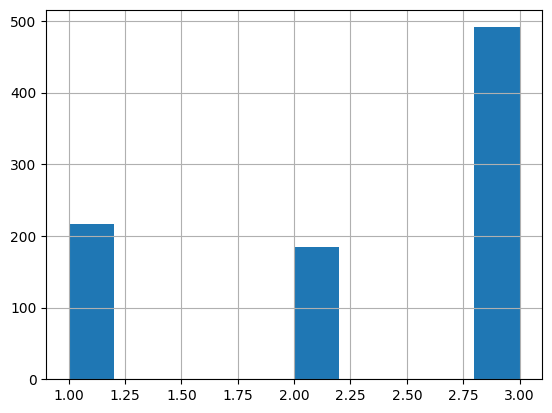

In [8]:
df['Pclass'].hist()

<Axes: >

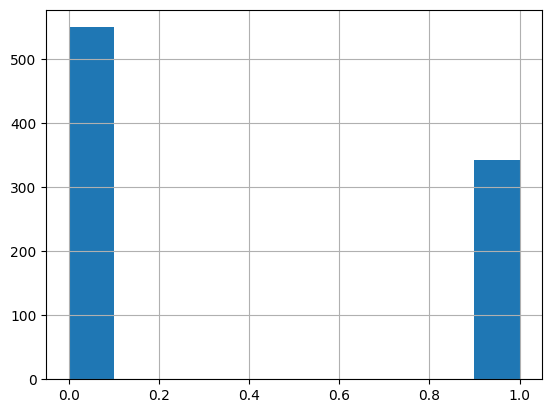

In [9]:
df['Survived'].hist()

##Data Preprocessing.

In [10]:
df_test.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,45
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
#df_train['Cabin'].fillna("NIL")
#df_train['Age'].fillna(0)
#df_train['Embarked'].fillna("NIL")


df_train[['Cabin','Embarked']] = df_train[['Cabin','Embarked']].fillna('')
df_train[('Age')] = df_train['Age'].fillna(0)

df_test[['Cabin','Embarked']] = df_test[['Cabin','Embarked']].fillna('')
df_test[('Age')] = df_test['Age'].fillna(0)

#df_test['Cabin'].fillna("NIL")
#df_test['Age'].fillna(0)
#df_test['Embarked'].fillna("NIL")

In [12]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
X_train = df_train.drop(['PassengerId','Name', 'Ticket', "Survived","Cabin"], axis = 1)
Y_train = df_train["Survived"]


X_test = df_test.drop(['PassengerId','Name', 'Ticket', "Survived","Cabin"], axis = 1)
Y_test = df_test["Survived"]

##Feature Engineering


In [14]:
categorical_attributes = X_train.select_dtypes(include=["object"]).columns
numerical_attributes = X_train.select_dtypes(include=["float64", "int64"]).columns


ct = sklearn.compose.ColumnTransformer(
    [
        ("onehotencoder: ", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"),categorical_attributes),
        ("standardize ", sklearn.preprocessing.StandardScaler(),numerical_attributes)
    ],
    remainder = "passthrough"
    )


ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#Model

##Model Training

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


DecisionTreeClassifier()

In [16]:
model1 = SVC()
model1.fit(X_train, Y_train)

SVC()

##Model Evaluation

In [17]:
Y_pred = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(Y_test, Y_pred)
accuracy

0.7937219730941704

In [18]:
Y_pred1 = model1.predict(X_test)
accuracy1 = sklearn.metrics.accuracy_score(Y_test, Y_pred1)
accuracy1

0.8251121076233184